In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/content/car data.csv')


In [3]:
print(df.head())
print(df.info())
print(df.describe())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [4]:
df['Car_Age'] = 2024 - df['Year']
df.drop(['Year'], axis=1, inplace=True)


In [5]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


In [6]:
df.drop(['Car_Name'], axis=1, inplace=True)


In [7]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.9339387986885236
R2 Score: 0.9594566919773236


In [11]:
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)


Present_Price              0.881166
Car_Age                    0.059495
Driven_kms                 0.040265
Transmission_Manual        0.009646
Fuel_Type_Diesel           0.004339
Fuel_Type_Petrol           0.002564
Selling_type_Individual    0.002155
Owner                      0.000370
dtype: float64


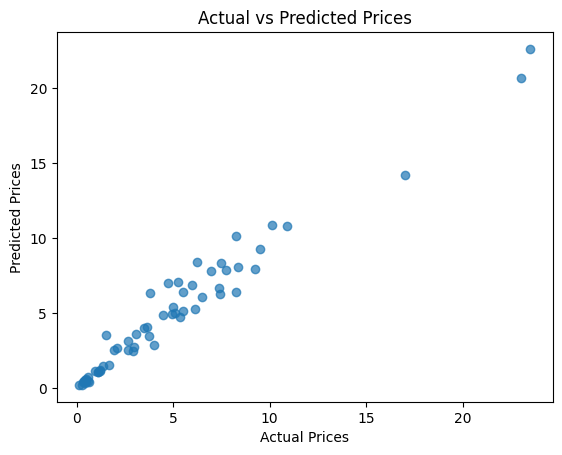

In [12]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


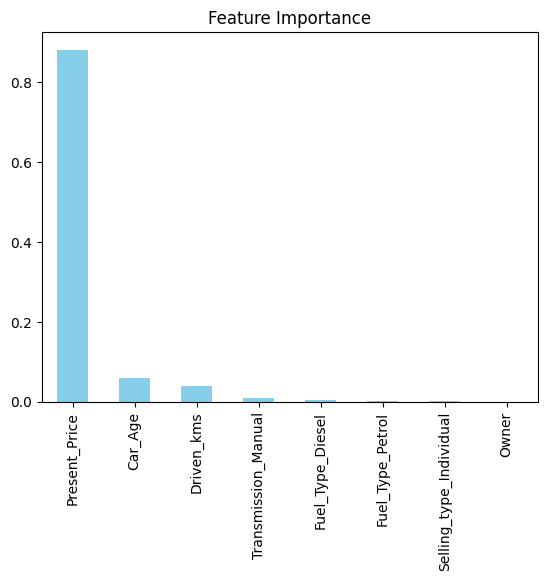

In [13]:
importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.show()
